# Twitter-Sentiment-**Analysis**

Importing necessary libraries for data processing, visualization, and NLP


In [ ]:
import numpy as np
import pandas as pd
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [ ]:
train = pd.read_csv('/content/train_tweet.csv')
test = pd.read_csv('/content/test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
train.isnull().any()
test.isnull().any()

,0
id,False
tweet,False


In [ ]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
# checking out the postive comments from the train set

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


Plotting the distribution of sentiment labels using a bar chart


<Axes: xlabel='label'>

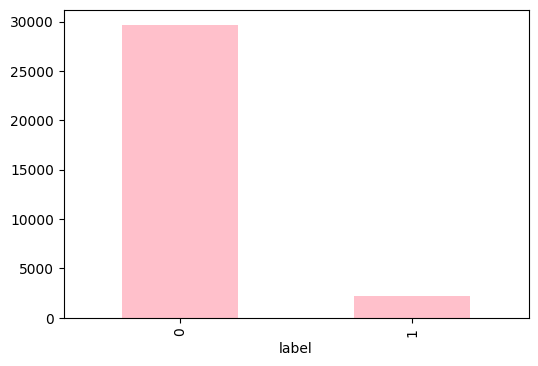

In [ ]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

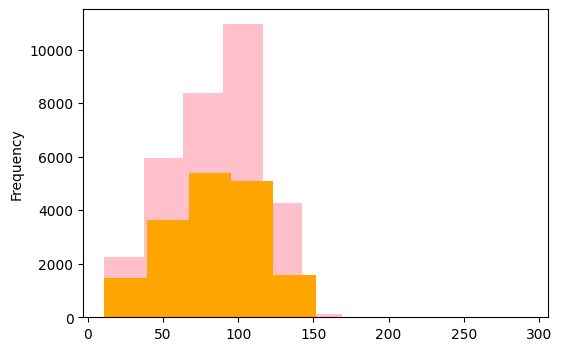

In [ ]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [ ]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


Displaying summary statistics for each sentiment label


In [ ]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

Plotting a histogram to show the variation of sentiment labels with respect to text length


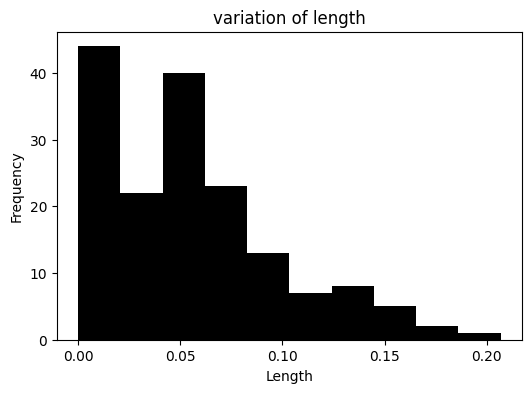

In [ ]:
train.groupby('len')['label'].mean().plot.hist(color = 'black', figsize = (6, 4),) # Change is here
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Extracting features from text using CountVectorizer while removing stop words

Calculating word frequencies and sorting them in descending order

Creating a DataFrame of word frequencies and plotting the top 30 most frequent words


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

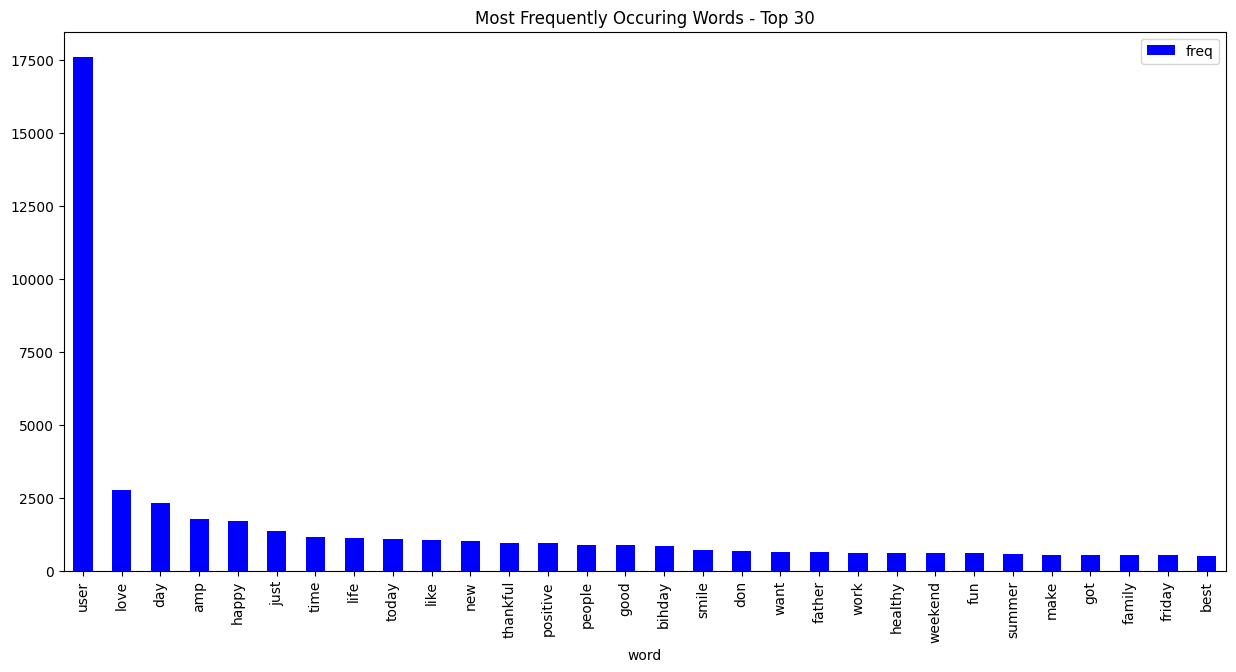

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

 Generating a word cloud to visualize the most frequent words in the dataset


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

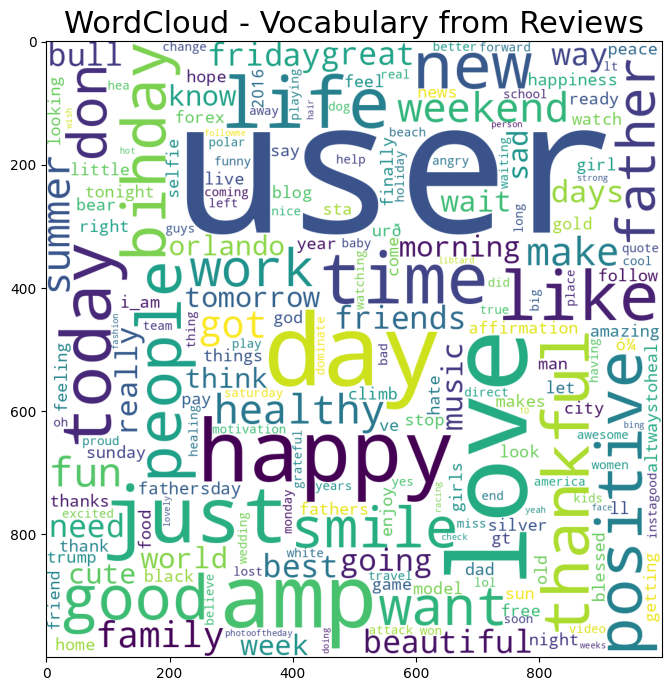

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

Creating a word cloud for neutral tweets (label = 0) to visualize common words


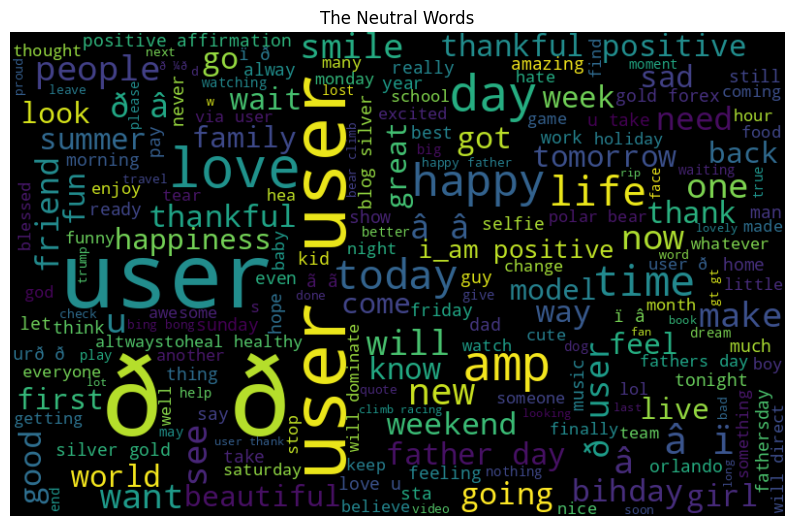

In [ ]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

Creating a word cloud for negative tweets (label = 1) to visualize common words


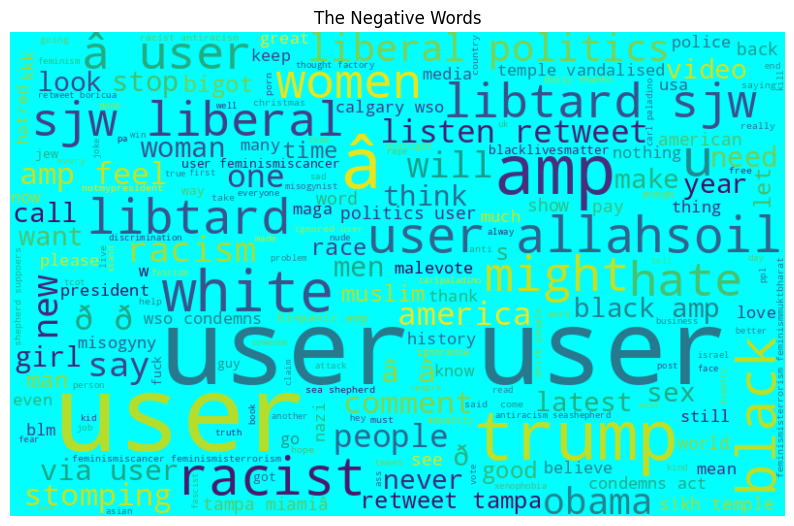

In [ ]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

Function to extract hashtags from text using regular expressions


In [ ]:
# collecting the hashtags
import re # Importing the 're' module

def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

Extracting hashtags from neutral (label = 0) and negative (label = 1) tweets

 Flattening the nested lists of extracted hashtags


In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Calculating frequency distribution of hashtags in neutral tweets

Creating a DataFrame and selecting the top 20 most frequent hashtags

Plotting a bar chart to visualize the most common hashtags


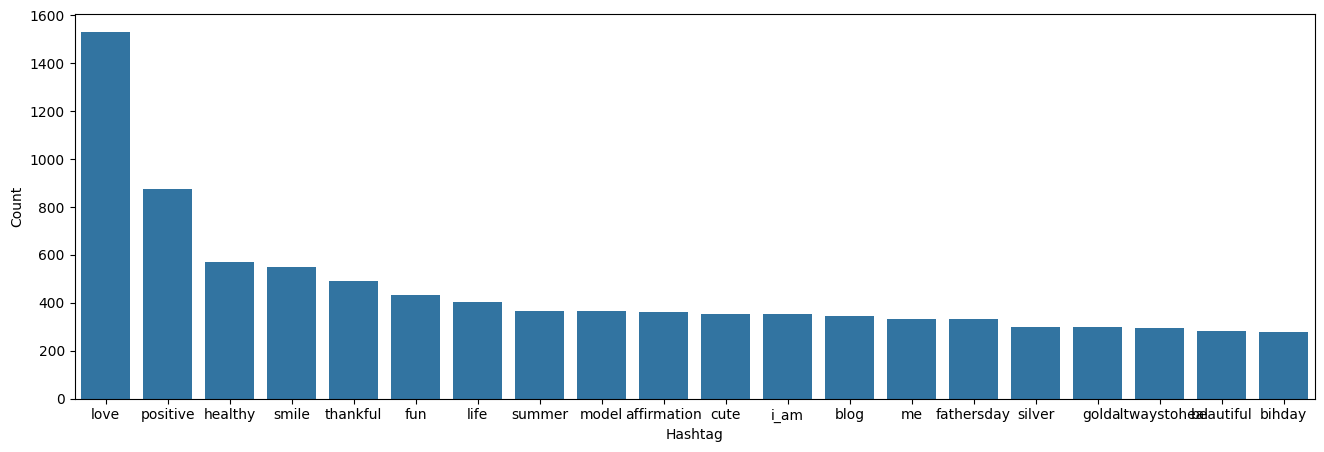

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Calculating frequency distribution of hashtags in negative tweets

Creating a DataFrame and selecting the top 20 most frequent hashtags

Plotting a bar chart to visualize the most common negative hashtags


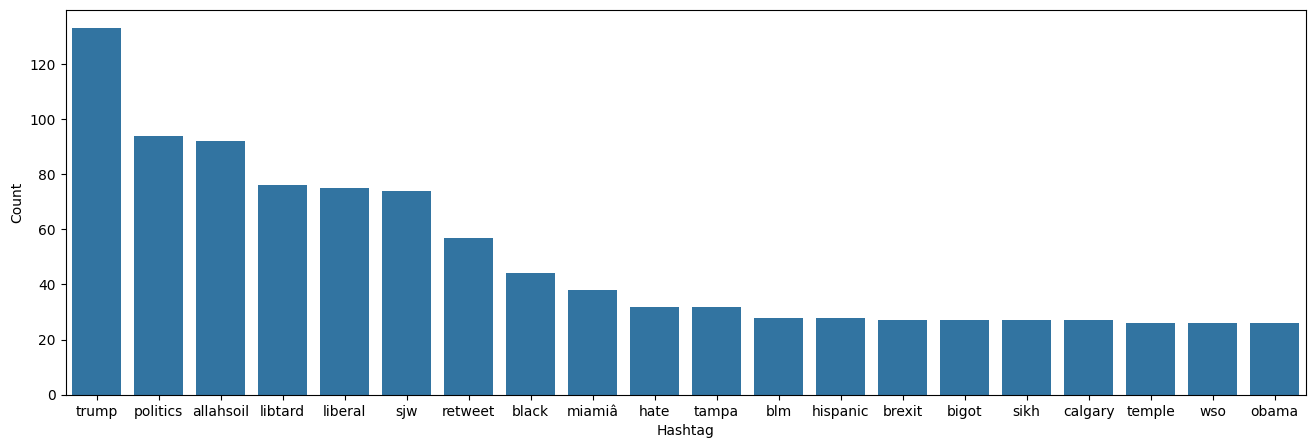

In [ ]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Tokenizing tweets into words for further processing

Creating a Word2Vec model to generate word embeddings

Training the model with a skip-gram approach for better context learning


In [ ]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split())

# importing gensim
import gensim

# creating a word to vector model
# Replacing 'size' with 'vector_size'
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6109705, 8411580)

Retrieving words most similar to "dinner" based on the trained Word2Vec model


In [ ]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6125326156616211),
 ('#prosecco', 0.5993106961250305),
 ('bay.', 0.5895345211029053),
 ('weekend...', 0.5815731287002563),
 ('coaching', 0.5776922702789307),
 ('podium', 0.5732713341712952),
 ('ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»â\x9d¤ï¸\x8fâ\x9d¤ï¸\x8f',
  0.5728712677955627),
 ('sister!!', 0.5727469325065613),
 ('enroute', 0.5720365047454834),
 ('7!', 0.5718224048614502)]

In [ ]:
model_w2v.wv.most_similar(positive = "cancer")

[('#merica', 0.7137270569801331),
 ('ownership', 0.7104191184043884),
 ('tolerance', 0.7101801037788391),
 ('level.', 0.7035010457038879),
 ("society's", 0.7006967663764954),
 ('champion,', 0.6972829699516296),
 ('aol', 0.6970691680908203),
 ('law.', 0.6935480237007141),
 ('disregard', 0.6928734183311462),
 ('spewing', 0.684097409248352)]

In [ ]:
model_w2v.wv.most_similar(positive = "apple")

[('"mytraining"', 0.7207717299461365),
 ('mytraining', 0.7122980952262878),
 ('training"', 0.6943390965461731),
 ('app,', 0.6544176340103149),
 ('"my', 0.604530394077301),
 ('app', 0.5996221899986267),
 ('ta', 0.5843995809555054),
 ('humans.', 0.5792651176452637),
 ('bees', 0.5770910978317261),
 ('ios', 0.5652258396148682)]

In [ ]:
model_w2v.wv.most_similar(negative = "hate")

[('â\x9c\x88ï¸\x8f', 0.03302677720785141),
 ('#community', 0.024246927350759506),
 ('#foodie', 0.023918047547340393),
 ('#staup', 0.020659981295466423),
 ('#bus', 0.015449747443199158),
 ('board', 0.015276094898581505),
 ('#hungry', 0.006482176948338747),
 ('#webdesign', 0.003036114852875471),
 ('ð\x9f\x8d»', 0.0030067311599850655),
 ('#tgif', 0.002539254492148757)]

Importing tqdm for progress tracking



In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

# Instead of:
# labeled_sentence = LabeledSentence(words=tokens, tags=[tag])

# Use:
# tagged_document = TaggedDocument(words=tokens, tags=[tag])

Function to label each tweet for Doc2Vec training

Using TaggedDocument to associate each tweet with a unique identifier

Labeling all tweets and displaying the first 6 labeled examples


In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
# Instead of importing LabeledSentence, import TaggedDocument
from gensim.models.doc2vec import TaggedDocument

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        # Replace LabeledSentence with TaggedDocument
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

Importing necessary libraries for text preprocessing

Downloading stopwords for removing common words that add little meaning

Importing PorterStemmer for stemming words to their root form


In [ ]:

# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Initializing an empty list to store preprocessed tweets

Removing non-alphabetic characters from each tweet

Converting text to lowercase for uniformity

Splitting the tweet into individual words

Applying stemming to reduce words to their root form

Removing stopwords to retain only meaningful words

Joining the processed words back into a cleaned sentence

Appending the cleaned tweet to the corpus


In [ ]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

Initializing an empty list to store preprocessed test tweets

Removing non-alphabetic characters from each test tweet

Converting text to lowercase for uniformity

Splitting the tweet into individual words

Applying stemming to reduce words to their root form

Removing stopwords to retain only meaningful words

Joining the processed words back into a cleaned sentence

Appending the cleaned tweet to the test corpus


In [ ]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

Importing CountVectorizer to convert text data into a bag-of-words model

Initializing CountVectorizer with a maximum of 2500 features

Transforming the preprocessed training corpus into a numerical feature matrix

Extracting the target variable (labels) from the dataset

Printing the shape of the feature matrix and the target variable for verification


In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


Importing CountVectorizer to convert text data into a bag-of-words model

Initializing CountVectorizer with a maximum of 2500 features

Transforming the preprocessed test corpus into a numerical feature matrix

Printing the shape of the transformed test dataset for verification


In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


Importing train_test_split to split the dataset into training and validation sets

Splitting the dataset with 75% for training and 25% for validation

Setting a random state for reproducibility

Printing the shapes of the resulting train and validation sets for verification


In [ ]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


Importing StandardScaler for feature scaling

Fitting and transforming the training data to standardize features

Transforming the validation and test data using the same scaler to maintain consistency


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

Importing RandomForestClassifier for classification
Importing confusion_matrix and f1_score for model evaluation

Initializing and training the RandomForestClassifier model
Predicting the labels for the validation set

Printing training and validation accuracy
Calculating and printing the F1 score to measure model performance

Generating and printing the confusion matrix to evaluate prediction results


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9520710799649605
F1 score : 0.6055612770339855
[[7314  118]
 [ 265  294]]


Importing LogisticRegression for classification

Initializing and training the Logistic Regression model

Predicting the labels for the validation set

Printing training and validation accuracy

Calculating and printing the F1 score to measure model performance

Generating and printing the confusion matrix to evaluate prediction results


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9848984189228651
Validation Accuracy : 0.943186084344888
f1 score : 0.598939929328622
[[7198  234]
 [ 220  339]]


Importing DecisionTreeClassifier for classification

Initializing and training the Decision Tree model

Predicting the labels for the validation set

Printing training and validation accuracy

Calculating and printing the F1 score to measure model performance

Generating and printing the confusion matrix to evaluate prediction results


In [49]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9341759479414341
f1 score : 0.5534804753820034
[[7139  293]
 [ 233  326]]


Importing Support Vector Classifier (SVC) from sklearn

Initializing and training the SVM model

Predicting labels for the validation set

Printing training and validation accuracy to evaluate model performance

Calculating and displaying the F1 score for classification effectiveness

Generating and printing the confusion matrix to analyze prediction results


In [50]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.978181969880272
Validation Accuracy : 0.9521962207483419
f1 score : 0.49868766404199477
[[7419   13]
 [ 369  190]]


Importing XGBoost Classifier

Initializing and training the XGBoost model

Predicting labels for the validation set

Printing training and validation accuracy to assess model performance

Calculating and displaying the F1 score for model evaluation

Generating and printing the confusion matrix to analyze classification results


In [51]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9608693838388053
Validation Accuracy : 0.9550744587661119
f1 score : 0.5751479289940828
[[7389   43]
 [ 316  243]]
